# __Criptomoneda Cardano__

Importe los datos del precio de ``Cardano USD (ADA-USD)`` en su instancia de base de datos ``Docker``, teniendo en cuenta lo explicado durante esta sección. Luego dibuje un gráfico de candlestick para la criptomoneda. _(Ver el link en la introducción)_. Describa lo que puede observar en la serie de tiempo. Realice un análisis exploratorio de datos ``(EDA)`` para la serie de tiempo.

## Creación de tablas: `usdcardano`

In [5]:
connection = psycopg2.connect(user="Elianna_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="Elianna_db")
cursor = connection.cursor()

df = pd.read_csv('https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv')
df = df.sort_values(by = 'Date', ascending = True)

print(df.head())

connection.commit()
connection.close()

         Date      Open      High       Low     Close  Adj Close      Volume
0  2017-10-01  0.021678  0.032226  0.017354  0.024969   0.024969  50068700.0
1  2017-10-02  0.024607  0.030088  0.019969  0.025932   0.025932  57641300.0
2  2017-10-03  0.025757  0.027425  0.020690  0.020816   0.020816  16997800.0
3  2017-10-04  0.020864  0.022806  0.020864  0.021931   0.021931   9000050.0
4  2017-10-05  0.021951  0.022154  0.020859  0.021489   0.021489   5562510.0


Inicialmente se crea el DataFrame de los datos del precio de ``Cardano USD (ADA-USD)`` y se organiza de forma ascendente según la fecha. Asimismo, se imprimen las primeras 5 filas para obtener una vusualización prevía de la forma en de la data. 

In [6]:
connection = psycopg2.connect(user="Elianna_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="Elianna_db")
cursor = connection.cursor()


cursor.execute('''DROP TABLE IF EXISTS usdcardano''')
cursor.execute('''CREATE TABLE usdcardano(
    Date DATE,
    Open NUMERIC, 
    High NUMERIC, 
    Low NUMERIC,
    Close NUMERIC, 
    Adj_Close NUMERIC, 
    Volume NUMERIC)
''');

connection.commit()
connection.close()

En segundo lugar, creamos la tabla donde se alojarán los datos del DataFrame.

In [7]:
connection = psycopg2.connect(user="Elianna_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="Elianna_db")
cursor = connection.cursor()

query = 'INSERT INTO usdcardano (Date, Open, High, Low, Close, Adj_Close, Volume) VALUES (%s, %s, %s, %s, %s, %s, %s)'

val = df.to_records(index = False) 

cursor.executemany(query, val)

connection.commit()
connection.close()


Seguido, se define una cadena de consulta. En esta se especifica los nombres de las columnas en los que se insertarán los datos y utiliza marcadores de posición para los valores que serán proporcionados más adelante.

Se convierte el DataFrame ``df`` en un arreglo de registros. Esto transforma el DataFrame en una estructura para ejecutar inserciones de muchos datos en una sola llamada.

In [8]:
connection = psycopg2.connect(user="Elianna_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="Elianna_db")
cursor = connection.cursor()

cursor.execute('''  
    SELECT * FROM usdcardano
''')

data = cursor.fetchall()
data =  pd.DataFrame(data)
columns = []

for column in cursor.description:
    columns.append(column[0])
    
data.columns = columns 


connection.commit()
connection.close()



         date      open      high       low     close adj_close      volume
0  2017-10-01  0.021678  0.032226  0.017354  0.024969  0.024969  50068700.0
1  2017-10-02  0.024607  0.030088  0.019969  0.025932  0.025932  57641300.0
2  2017-10-03  0.025757  0.027425   0.02069  0.020816  0.020816  16997800.0
3  2017-10-04  0.020864  0.022806  0.020864  0.021931  0.021931   9000050.0
4  2017-10-05  0.021951  0.022154  0.020859  0.021489  0.021489   5562510.0


Por último, se ejecuta la consulta para seleccionar todos los datos de la tabla usdcardano.
Los resultados de la consulta se almacenan en las variables de data.

Una vez ejecutado el código anterior vamos a ``PgAdmin`` y verificamos en la ruta Servers > Empresa > Databases > Elianna_db > Schemas > public > Tables > usdcardano y seleccionamos la opción `All Rows` para ver la tabla y su contenido:

<img src="C:\Users\Eliana Gomez\Pictures\Screenshots\cap7.png">
<p style="text-align:center;">Tabla usdcardano en la base datos Elianna_db</p>


## Candlestick 

In [13]:
import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Candlestick - CARDANO USD',
                   xaxis_title='Date',
                   yaxis_title='Price',
                   xaxis_rangeslider_visible=False)

fig.show()


El gráfico de vela japonesa o candlestick nos muestra el comportamiento del precio de apertura y cierre de la criptomoneda Cardano USD. Las velas rojas ilustran los días en los que el precio de apertura es más alto que el precio de cierre, mientra que el verde es el caso opuesto, días en los que el precio de aprtura es más bajo que el de cierre. 

En este también se aprecía una tendecia alcista desde finales del 2017 hasta enero del 2018. En enero del 2018 la tendencia cae hasta llegar a un comportamiento relativamente constante hasta enero del 2021 donde comenzó a aumentar nuevamente, mostrando en adelante esta misma tendencia con relativas fluctuaciones.

## Análisis Exploratorio de Datos 

In [23]:

print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


En primer lugar se verifica a que tipo de dato pertenece cada variable de nuestra data. La variable `Date` se representa como `object`, debido a que esta tiene formato de fecha. Por otro lado, todas la demás corresponden a ``float64``, lo que significa que estas columnas contienen números reales de doble precisión de 64 bits.

In [24]:
missing_values = df.isnull()
missing_counts = missing_values.sum()

print("Valores faltantes por columna:")
print(missing_counts)

Valores faltantes por columna:
Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


Seguido, verificamos que columnas tienen datos faltantes y cuantos. Se halló que, a excepción de `Date`, todas las columnas tienen un total de 4 celdas sin observación.

In [25]:

print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1471.000000  1471.000000  1471.000000  1471.000000  1471.000000   
mean      0.374234     0.393359     0.354385     0.375726     0.375726   
std       0.609602     0.639195     0.578952     0.611501     0.611501   
min       0.018414     0.021050     0.017354     0.018539     0.018539   
25%       0.047560     0.049503     0.046073     0.047592     0.047592   
50%       0.093398     0.096776     0.090105     0.093434     0.093434   
75%       0.301339     0.318211     0.283567     0.301889     0.301889   
max       2.966390     3.099186     2.907606     2.968239     2.968239   

             Volume  
count  1.471000e+03  
mean   1.090947e+09  
std    2.258370e+09  
min    1.739460e+06  
25%    5.366896e+07  
50%    1.359691e+08  
75%    6.999972e+08  
max    1.914198e+10  


Contamos con 1471 observaciones válidas para el precio de apertura de la criptomoneda Cardano. Por otro lado, el precio medio de apertura en el periodo de tiempo analizado fue de aproximadamente 0.374234 dólares. La desviación del precio de apertura con respecto la media fue de aproximadamente 0.609602 dólares, lo que indica una dispersión considerable en los valores con respecto a la media. Asimismo, tenemos que el 25% de los precios de apertura son menores que 0.047560 dólares, mientras que el 75% son menores que 0.301339 dólares. Además, la mitad de los datos están por encima y la otra mitad por debajo de 0.093398. En cuanto al precio de apertura mínimo registrado, fue 0.018414 dólares y el máximo fue de 2.966390 dólares. High (Precio Máximo), Low (Precio Mínimo), Close (Precio de Cierre), Adj Close (Precio de Cierre Ajustado) presentan un comportamiento similar.

Por otro lado, el volumen de transacciones de Cardano se comportó así: se registraron 1471 observaciones válidas. El promedio de transacciones fue de 1,090,947,000 unidades. En cuanto a La desviación estándar del volumen de transacciones fue de aproximadamente 2,258,370,000 unidades. El volumen mínimo registrado fue 1,739,460 unidades, mientras que el máximo de transacciones registrado fue de aproximadamente 19,141,980,000 unidades. Además, El 25% del número de transacciones fue menor que aproximadamente 53,668,960 unidades. En cuando al 75% menores que aproximadamente 699,997,200 unidades. La mediana nos indica que la mitad del volumen registrado estuvo por encima y la otra mitad por debajo de 135,969,100unidades.


También se analizó la correlación entre las variables en cuestión: 

### Diagrama de dispersión 

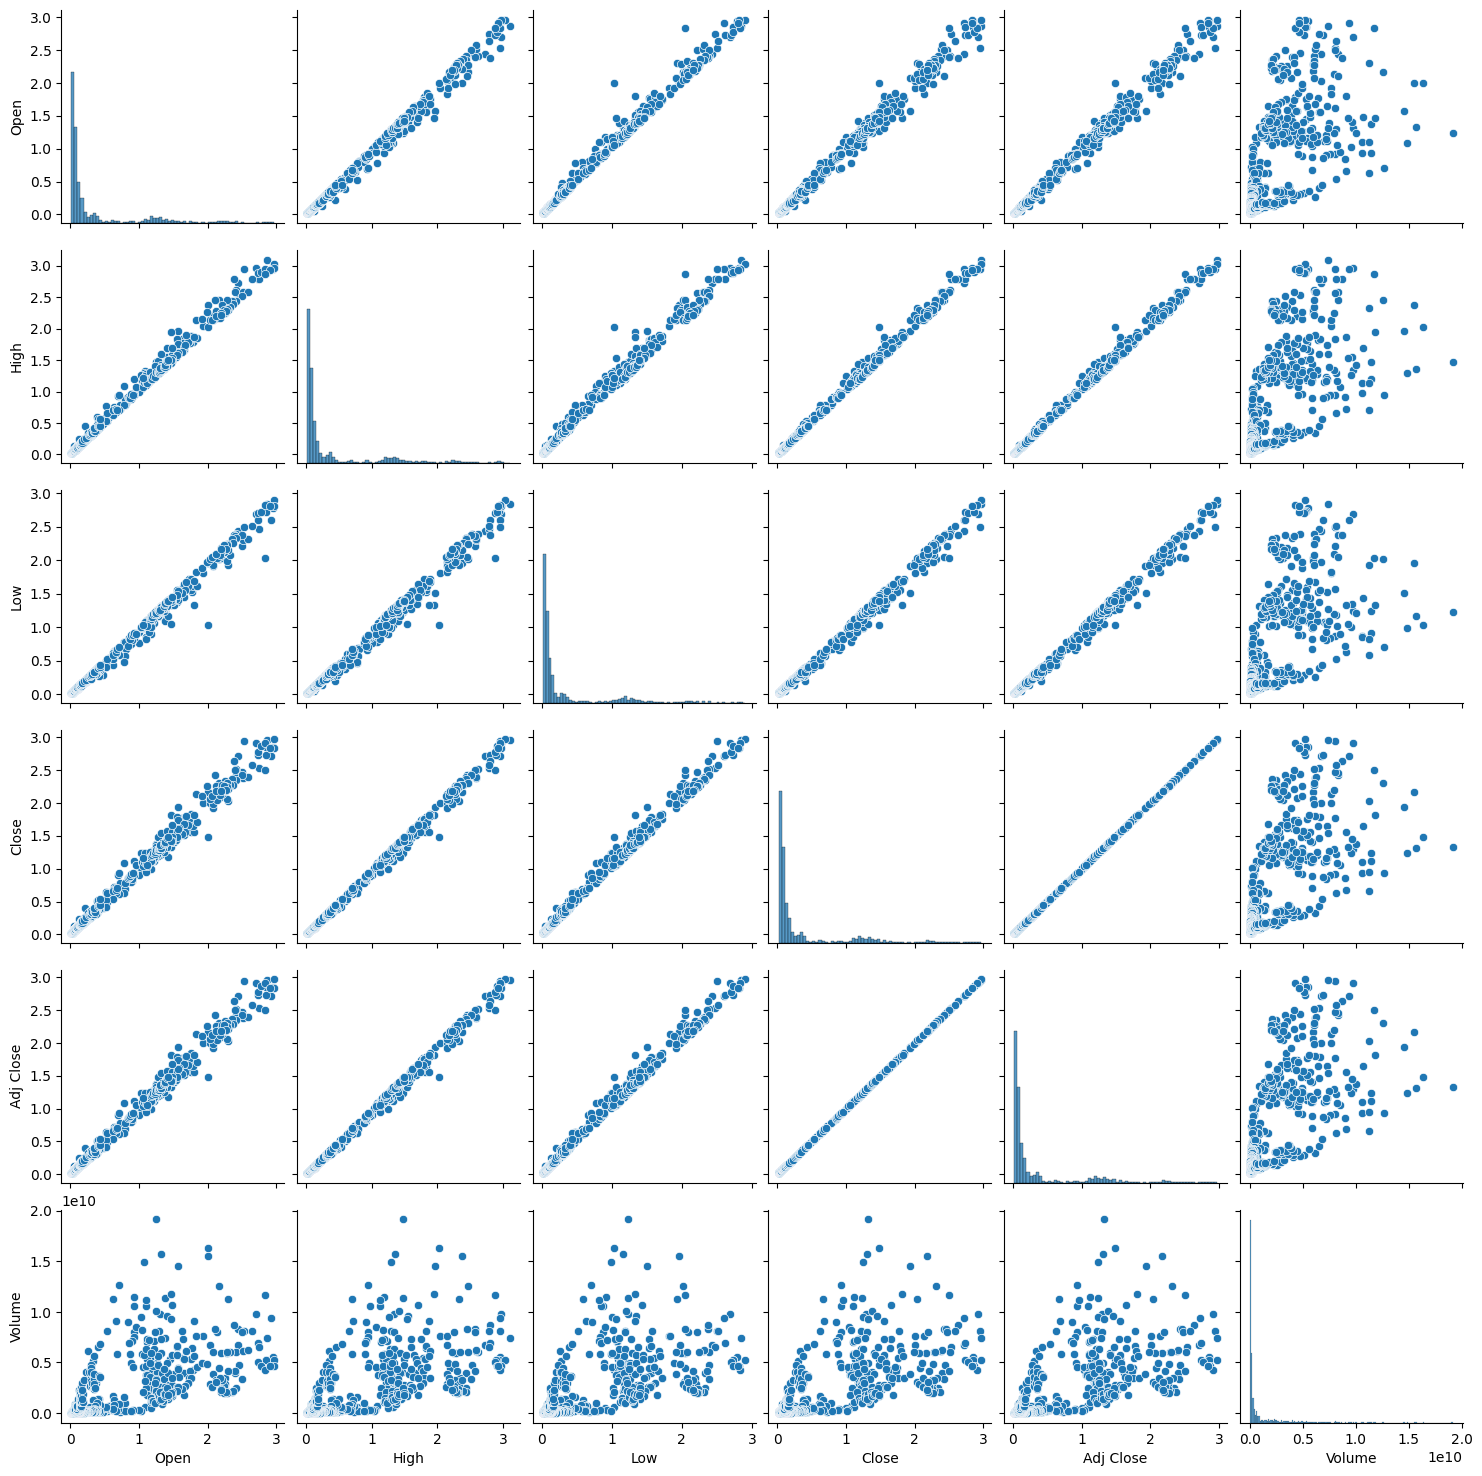

In [26]:
sns.pairplot(df)
plt.show()

A partir de la gráfica se analiza una alta correlación positiva entre todas las variables, a excepción del volumen de trannsacciones, que no muestra una tendencia en relación con el comportamiento de todas las demás.

### Diagramas de tendencia 

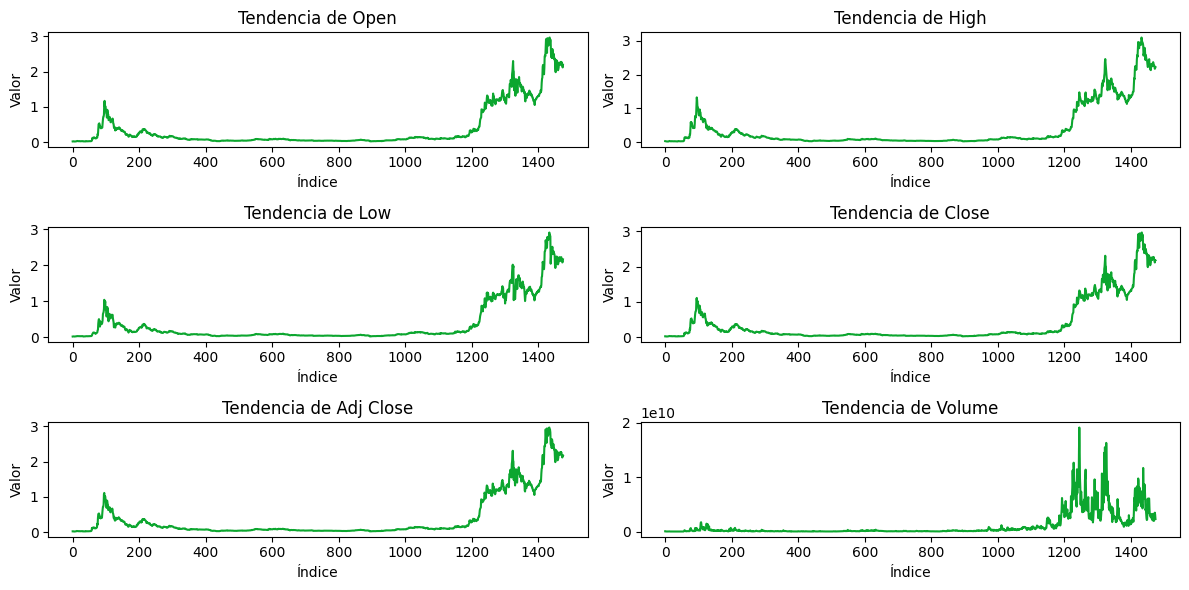

In [14]:
columns_to_plot = df.columns[df.columns != 'Date']

num_rows = (len(columns_to_plot) + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

if not isinstance(axes, np.ndarray):
    axes = np.array([axes])

for col, ax in zip(columns_to_plot, axes.flatten()):
    ax.plot(df[col], color='#0CA62F')
    ax.set_title(f'Tendencia de {col}')
    ax.set_xlabel('Índice')
    ax.set_ylabel('Valor')
    ax.grid(False)

# Eliminar los ejes sobrantes
for i in range(len(columns_to_plot), num_rows*num_cols):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


En estos gráficos se aprecían las tendecia de el precio de apertura, cirre, precio máximo, mínimo y el volumen de transacciones. Se puede contrastar con el candlestick, notandose claramente el comportamiento de las variables en cuestión.

### Histogramas de frecuencia 

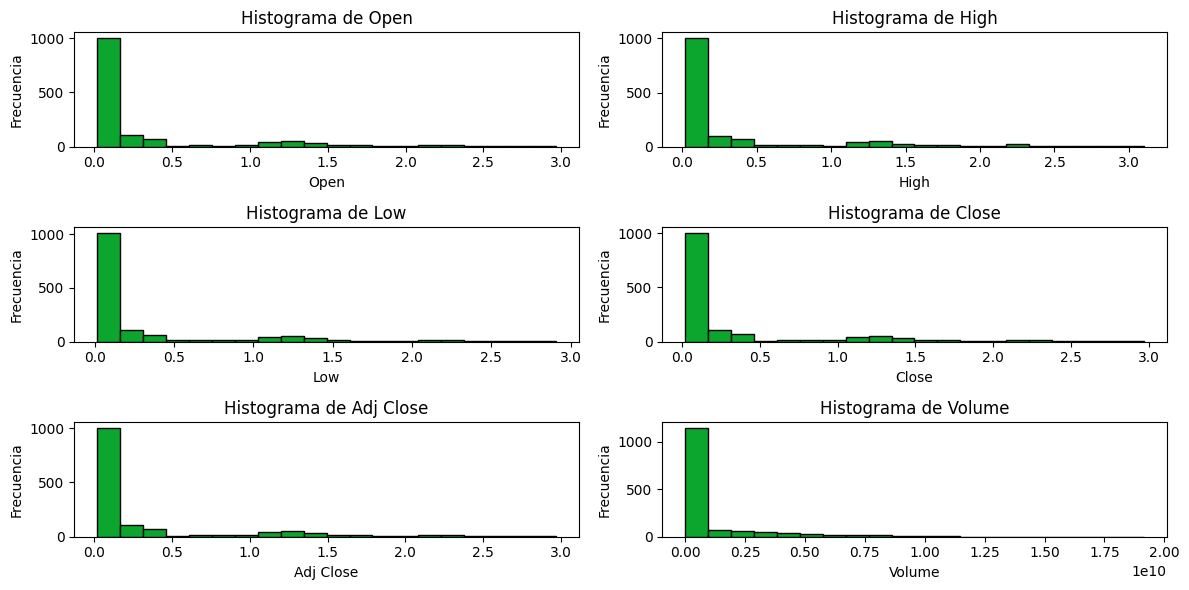

In [28]:
columns_to_plot = df.columns[df.columns != 'Date']

num_rows = (len(columns_to_plot) + 1) // 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

if not isinstance(axes, np.ndarray):
    axes = np.array([axes])
    
for col, ax in zip(columns_to_plot, axes.flatten()):
    ax.hist(df[col], bins=20, color='#0CA62F', edgecolor='black')
    ax.set_title(f'Histograma de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')
    ax.grid(False)
    
plt.tight_layout()

plt.show()

Los histogramas nos muestran que las variables analizadas tienen una distribución similar, sesgada a la izquierda. Asimismo, indican que ninguna de estads tiene un distribución normal, sin embargo, se precisa una prueba de normalidad para no basar el jucio en métodos puramente gráficos. 

### Prueba de normalidad 

In [16]:
numeric_columns = df.select_dtypes(include=['float64'])

for col in numeric_columns.columns:
    stat, p_value = stats.normaltest(df[col].dropna())
    print(f'Variable: {col}')
    print(f'Estadística de prueba: {stat}')
    print(f'Valor p: {p_value}')
    if p_value < 0.05:
        print('NO proviene de una distribución normal.')
    else:
        print('Proviene de una distribución normal.')
    print('-' * 50)

Variable: Open
Estadística de prueba: 633.7146501628451
Valor p: 2.4581714284017565e-138
NO proviene de una distribución normal.
--------------------------------------------------
Variable: High
Estadística de prueba: 622.7728343098248
Valor p: 5.842480748099943e-136
NO proviene de una distribución normal.
--------------------------------------------------
Variable: Low
Estadística de prueba: 645.2044468235598
Valor p: 7.863837354782638e-141
NO proviene de una distribución normal.
--------------------------------------------------
Variable: Close
Estadística de prueba: 630.5272729697033
Valor p: 1.2098800897679065e-137
NO proviene de una distribución normal.
--------------------------------------------------
Variable: Adj Close
Estadística de prueba: 630.5272729697033
Valor p: 1.2098800897679065e-137
NO proviene de una distribución normal.
--------------------------------------------------
Variable: Volume
Estadística de prueba: 1025.8402826030285
Valor p: 1.7442670454537244e-223
NO pr

Se concluye no normalidad en las varaibles en cuestión. 

### Diagrama de cajas y bigotes 

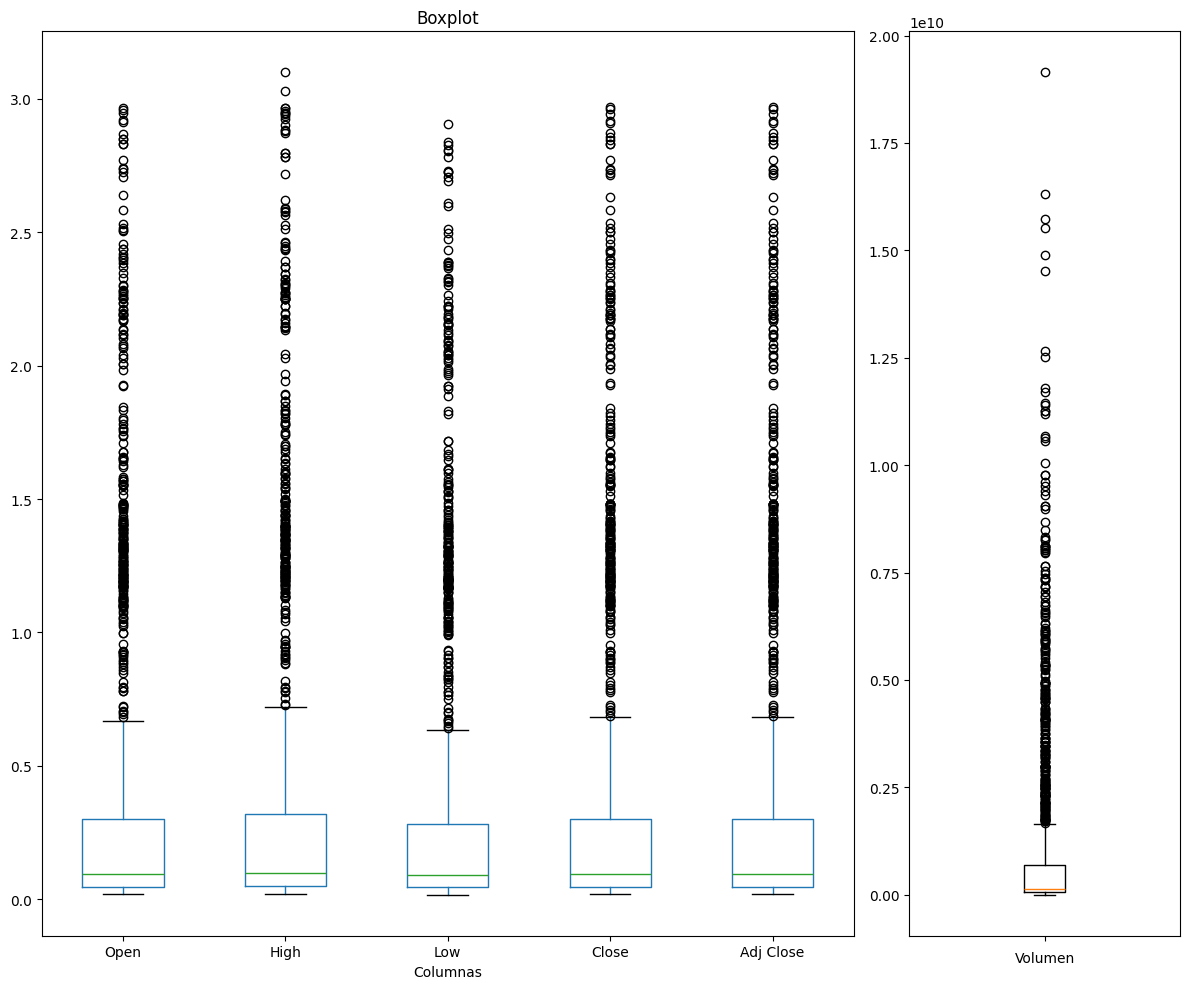

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 10), gridspec_kw={'width_ratios': [3, 1]})

columns_to_plot = df.columns[df.columns != 'Volume']

df[columns_to_plot].boxplot(ax=axes[0], grid = False)
axes[0].set_title('Boxplot')
axes[0].tick_params(axis='x')  
axes[0].set_xlabel('Columnas')


axes[1].boxplot(df['Volume'].dropna())
axes[1].set_title('')
axes[1].set_xlabel('Volumen')  
axes[1].set_xticklabels([])

plt.tight_layout()

plt.show()

Por último obtenemos el gráfico de cajas y bigotes, nos muestra el commportamiento de la distrubución, por lo que podemos constrastar lo presentado en este gráfico con los histograms de frecuencia. Adicionalmente, se presenta el sesgo de la distribución y la precensia de multiples datos atipicos en el conjunto de datos para cada una de las variables analizadas. Además, se puede realizar el análisis en simultaneo con lo hallado en las medidas de tendencia central, dispersión y de posición. 

En conclusión, el análisis de los datos de la criptomoneda Cardano en dólares revela una amplia variabilidad en los precios de apertura, cierre, máximo y mínimo, así como en el volumen de transacciones. Se observa una alta correlación positiva entre estas variables, excepto para el volumen de transacciones, que parece comportarse de manera diferente. Además, se identifican múltiples valores atípicos en todas las variables, lo que indica la presencia de eventos extremos en los datos. Aunque la distribución de los datos muestra un sesgo hacia la izquierda, se requierió una prueba de normalidad adicional con la que se confirmó esta observación. En general, estos hallazgos proporcionan una visión detallada del comportamiento de Cardano en el mercado de criptomonedas, pero se recomienda realizar análisis estadísticos más avanzados para una comprensión más completa de los datos.






